### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [84]:
data = pd.read_csv('data/coupons.csv')

In [85]:
data.head(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
97,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
98,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


In [86]:

null_data = data.isnull().sum()
non_null_data = data.notnull().sum()

print(null_data)
print('-------------------')
print(non_null_data)



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
-------------------
destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expirat

2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

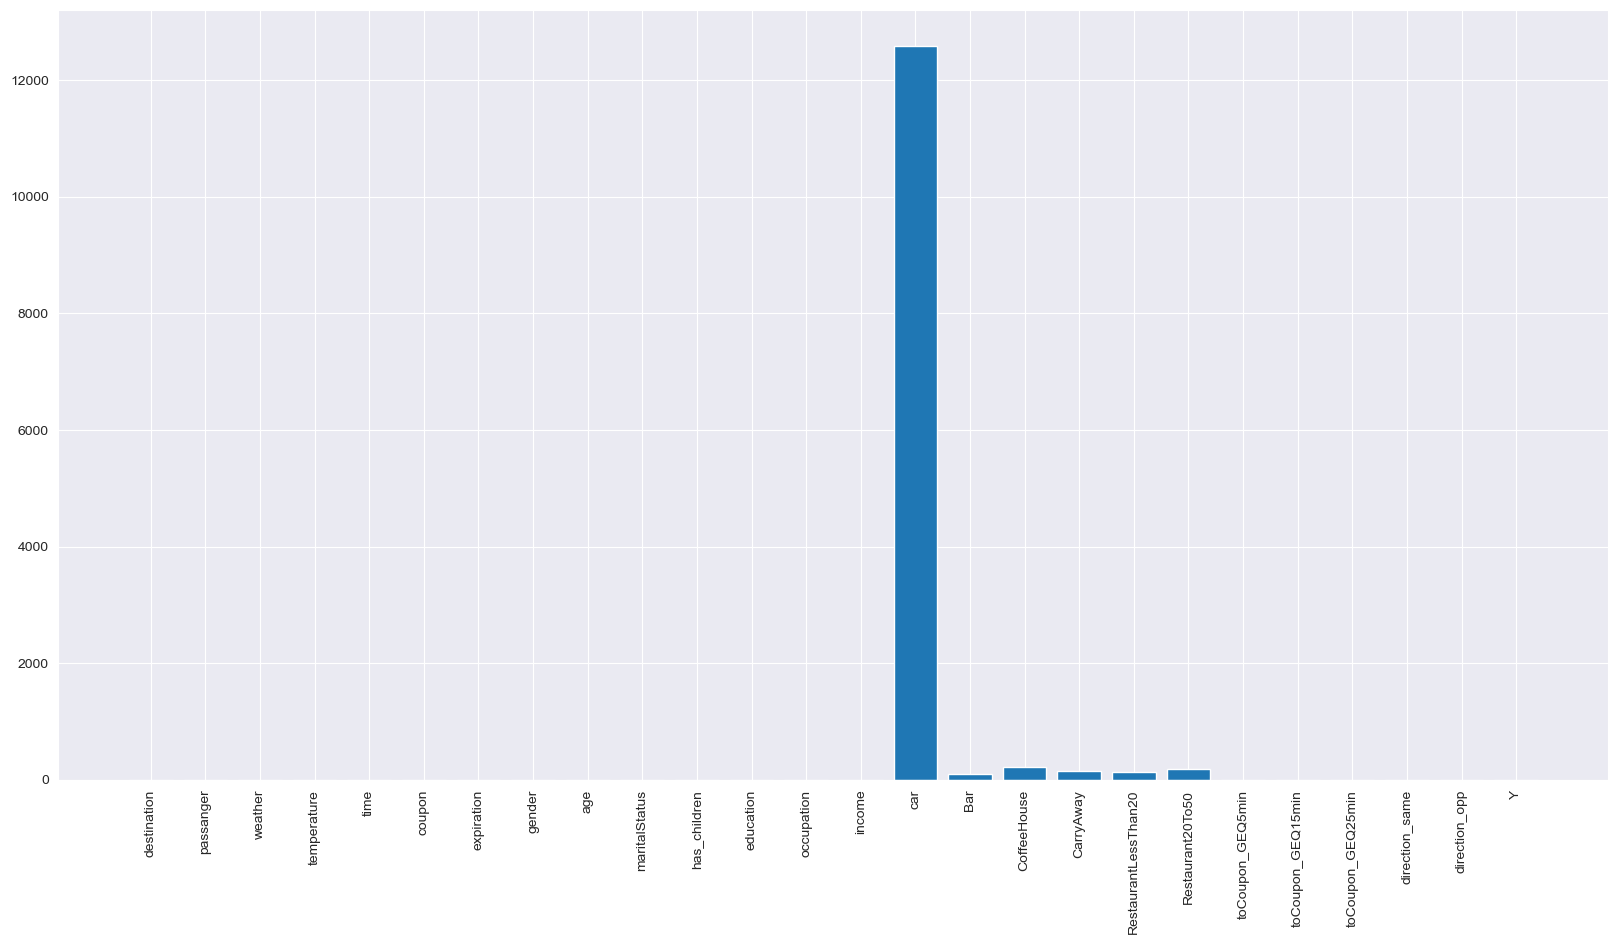

In [87]:
# Check for missing data or problematic data

data.info()
# Plot missing data columns histogram
plt.figure(figsize=(20,10))
plt.bar(data.columns, data.isnull().sum())
plt.xticks(rotation=90)
plt.show()




3. Decide what to do about your missing data -- drop, replace, other...

In [88]:
# fill in missing data
# Drop Car column as it is not relevant to the analysis
data = data.drop(columns=['car'])

#  List columns having missing data
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

# Fill in data with the mode
for column in missing_data.index:
    data[column] = data[column].fillna(data[column].mode()[0])
    
# Check if there are any missing data
data.isnull().sum()


# print Age column unique values
print(data['age'].unique())
# Convert Age column to numeric values,
data.loc[data['age'] == 'below21', 'age'] = 20
data.loc[data['age'] == '21', 'age'] = 21
data.loc[data['age'] == '46', 'age'] = 46
data.loc[data['age'] == '36', 'age'] = 36
data.loc[data['age'] == '26', 'age'] = 26
data.loc[data['age'] == '50plus', 'age'] = 50
data.loc[data['age'] == '31', 'age'] = 31
data.loc[data['age'] == '41', 'age'] = 41


#print uniq values of the column income
print(data['income'].unique())






['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


4. What proportion of the total observations chose to accept the coupon? 



Y
1    7210
0    5474
Name: count, dtype: int64
Proportion of the total observations that chose to accept the coupon: 0.5684326710816777


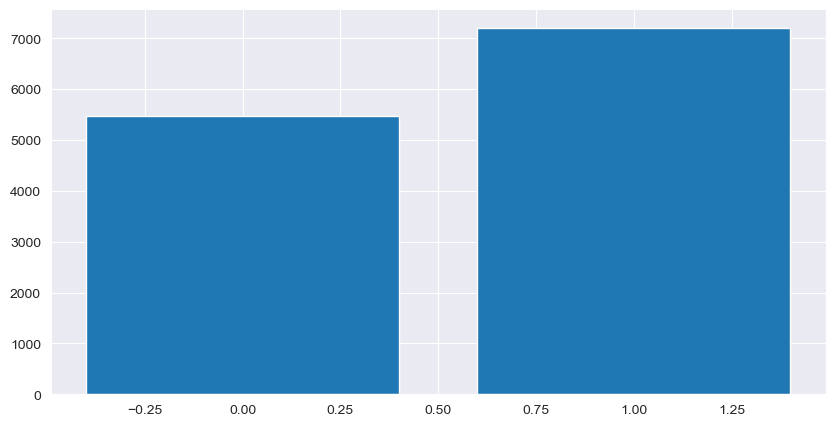

In [35]:
# Proportion of the total observations that chose to accept the coupon
accepted = data['Y'].value_counts()
print(accepted)
print('Proportion of the total observations that chose to accept the coupon:', accepted[1]/(accepted[0] + accepted[1]))
# Plot histogram of the proportion of the total observations that chose to accept the coupon
plt.figure(figsize=(10,5))
plt.bar(accepted.index, accepted)
plt.show()





5. Use a bar plot to visualize the `coupon` column.

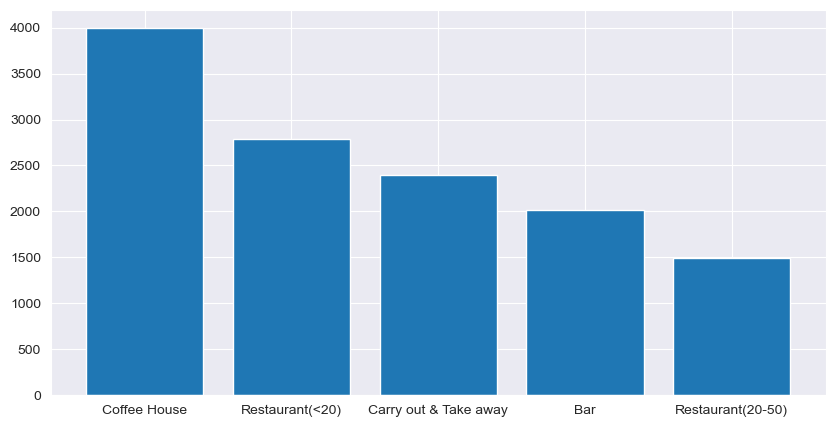

In [36]:
# Bar plot to visualize the coupon column
coupon = data['coupon'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(coupon.index, coupon)
plt.show()


6. Use a histogram to visualize the temperature column.

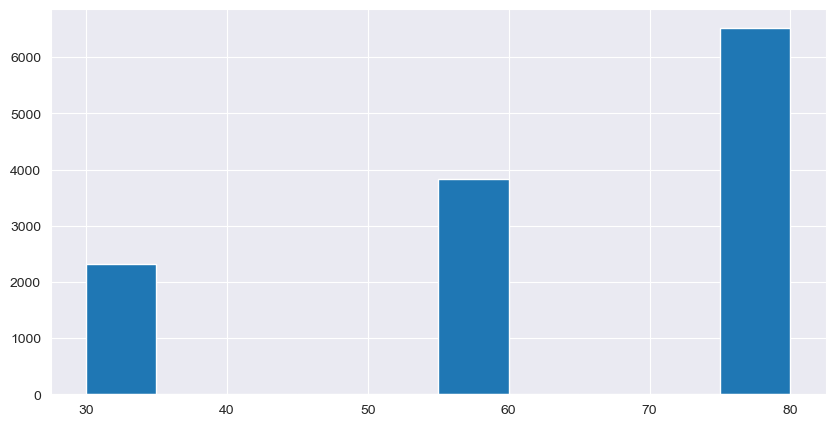

In [37]:
# Histogram to visualize the temperature column
plt.figure(figsize=(10,5))
plt.hist(data['temperature'])
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [72]:
# Create a new DataFrame that contains just the bar coupons
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [73]:
# Proportion of bar coupons that were accepted
accepted_bar = bar_coupons['Y'].value_counts()
print(accepted_bar)
print('Proportion of bar coupons that were accepted:', accepted_bar[1]/(accepted_bar[0] + accepted_bar[1]))


Y
0    1190
1     827
Name: count, dtype: int64
Proportion of bar coupons that were accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [74]:

bar_coupons_value_count = bar_coupons['Bar'].value_counts()
print(bar_coupons_value_count)
# Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more
# Coupons Accepted for those who went to a bar 3 or fewer times a month
bar_coupons_3_or_fewer = bar_coupons[bar_coupons['Bar'] == '1~3']
accepted_bar_3_or_fewer = bar_coupons_3_or_fewer['Y'].value_counts()
print(accepted_bar_3_or_fewer)
print('Proportion of bar coupons that were accepted for those who went to a bar 3 or fewer times a month:', accepted_bar_3_or_fewer[1]/(accepted_bar_3_or_fewer[0] + accepted_bar_3_or_fewer[1]))






Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64
Y
1    257
0    140
Name: count, dtype: int64
Proportion of bar coupons that were accepted for those who went to a bar 3 or fewer times a month: 0.6473551637279596


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [76]:
# Convert Bar column to numeric values,
bar_coupons.loc[bar_coupons['Bar'] == 'never', 'Bar'] = 0
bar_coupons.loc[bar_coupons['Bar'] == 'less1', 'Bar'] = 1
bar_coupons.loc[bar_coupons['Bar'] == '1~3', 'Bar'] = 2
bar_coupons.loc[bar_coupons['Bar'] == '4~8', 'Bar'] = 3
bar_coupons.loc[bar_coupons['Bar'] == 'gt8', 'Bar'] = 4

print(bar_coupons['Bar'].value_counts())

# Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others
# Coupons Accepted for those who went to a bar more than once a month and are over the age of 25
bar_coupons_gt1 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)]
accepted_bar_gt1 = bar_coupons_gt1['Y'].value_counts()
print(accepted_bar_gt1)
print('Proportion of bar coupons that were accepted for those who went to a bar more than once a month and are over the age of 25:', accepted_bar_gt1[1]/(accepted_bar_gt1[0] + accepted_bar_gt1[1]))




Bar
0    851
1    570
2    397
3    150
4     49
Name: count, dtype: int64
Y
1    292
0    128
Name: count, dtype: int64
Proportion of bar coupons that were accepted for those who went to a bar more than once a month and are over the age of 25: 0.6952380952380952


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [78]:
# Compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
# Coupons Accepted for those who went to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
bar_coupons_gt1_occupations = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'kid') & (bar_coupons['occupation'] != 'farming-fishing-forestry')]
accepted_bar_gt1_occupations = bar_coupons_gt1_occupations['Y'].value_counts()
print(accepted_bar_gt1_occupations)
print('Proportion of bar coupons that were accepted for those who went to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:', accepted_bar_gt1_occupations[1]/(accepted_bar_gt1_occupations[0] + accepted_bar_gt1_occupations[1]))

Y
1    410
0    186
Name: count, dtype: int64
Proportion of bar coupons that were accepted for those who went to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 0.6879194630872483


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Y
1    410
0    186
Name: count, dtype: int64
Proportion of bar coupons that were accepted for those who went to a bar more than once a month, had passengers that were not a kid, and were not widowed: 0.6879194630872483
Y
1    249
0     96
Name: count, dtype: int64
Proportion of bar coupons that were accepted for those who went to a bar more than once a month and are under the age of 30: 0.7217391304347827
Y
1    110
0     40
Name: count, dtype: int64
Proportion of cheap restaurants coupons that were accepted for those who went to cheap restaurants more than 4 times a month and income is less than 50K: 0.7333333333333333


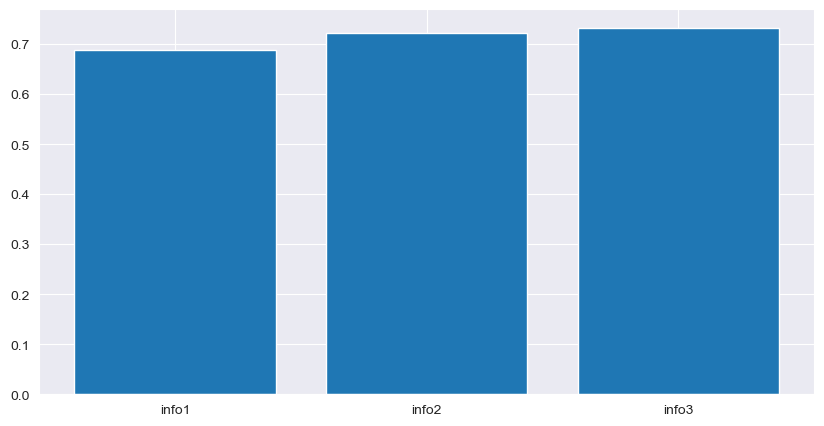

In [104]:

bar_coupons_gt1_occupations_not_widowed = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'kid') & (bar_coupons['maritalStatus'] != 'widowed')]
accepted_bar_gt1_occupations_not_widowed = bar_coupons_gt1_occupations_not_widowed['Y'].value_counts()
print(accepted_bar_gt1_occupations_not_widowed)

info1 =  accepted_bar_gt1_occupations_not_widowed[1]/(accepted_bar_gt1_occupations_not_widowed[0] + accepted_bar_gt1_occupations_not_widowed[1])
print('Proportion of bar coupons that were accepted for those who went to a bar more than once a month, had passengers that were not a kid, and were not widowed:', info1)


bar_coupons_gt1_age_lt30 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] < 30)]
accepted_bar_gt1_age_lt30 = bar_coupons_gt1_age_lt30['Y'].value_counts()
print(accepted_bar_gt1_age_lt30)
info2 = accepted_bar_gt1_age_lt30[1]/(accepted_bar_gt1_age_lt30[0] + accepted_bar_gt1_age_lt30[1])
print('Proportion of bar coupons that were accepted for those who went to a bar more than once a month and are under the age of 30:', info2)


cheap_restaurants = data[data['coupon'] == 'Restaurant(<20)']
cheap_restaurants_value_count = cheap_restaurants['coupon'].value_counts()



cheap_restaurants.loc[cheap_restaurants['RestaurantLessThan20'] == 'never', 'RestaurantLessThan20'] = -1
cheap_restaurants.loc[cheap_restaurants['RestaurantLessThan20'] == 'less1', 'RestaurantLessThan20'] = 1
cheap_restaurants.loc[cheap_restaurants['RestaurantLessThan20'] == '1~3', 'RestaurantLessThan20'] = 3
cheap_restaurants.loc[cheap_restaurants['RestaurantLessThan20'] == '4~8', 'RestaurantLessThan20'] = 4
cheap_restaurants.loc[cheap_restaurants['RestaurantLessThan20'] == 'gt8', 'RestaurantLessThan20'] = 8


cheap_restaurants.loc[cheap_restaurants['income'] == 'Less than $12500', 'income'] = 12500
cheap_restaurants.loc[cheap_restaurants['income'] == '$12500 - $24999', 'income'] = 24999
cheap_restaurants.loc[cheap_restaurants['income'] == '$25000 - $37499', 'income'] = 37499
cheap_restaurants.loc[cheap_restaurants['income'] == '$37500 - $49999', 'income'] = 49999
cheap_restaurants.loc[cheap_restaurants['income'] == '$50000 - $62499', 'income'] = 62499
cheap_restaurants.loc[cheap_restaurants['income'] == '$62500 - $74999', 'income'] = 74999
cheap_restaurants.loc[cheap_restaurants['income'] == '$75000 - $87499', 'income'] = 87499
cheap_restaurants.loc[cheap_restaurants['income'] == '$87500 - $99999', 'income'] = 99999
cheap_restaurants.loc[cheap_restaurants['income'] == '$100000 or More', 'income'] = 100000



cheap_restaurants_gt4_income_lt50k = cheap_restaurants[(cheap_restaurants['RestaurantLessThan20'] > 4) & (cheap_restaurants['income'] < 50000)]
accepted_cheap_restaurants_gt4_income_lt50k = cheap_restaurants_gt4_income_lt50k['Y'].value_counts()
print(accepted_cheap_restaurants_gt4_income_lt50k)
info3 = accepted_cheap_restaurants_gt4_income_lt50k[1]/(accepted_cheap_restaurants_gt4_income_lt50k[0] + accepted_cheap_restaurants_gt4_income_lt50k[1])
print('Proportion of cheap restaurants coupons that were accepted for those who went to cheap restaurants more than 4 times a month and income is less than 50K:', info3)


# Plot histogram of info1, info2, info3
plt.figure(figsize=(10,5))
plt.bar(['info1', 'info2', 'info3'], [info1, info2, info3])
plt.show()




7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

[0 1 2 3]


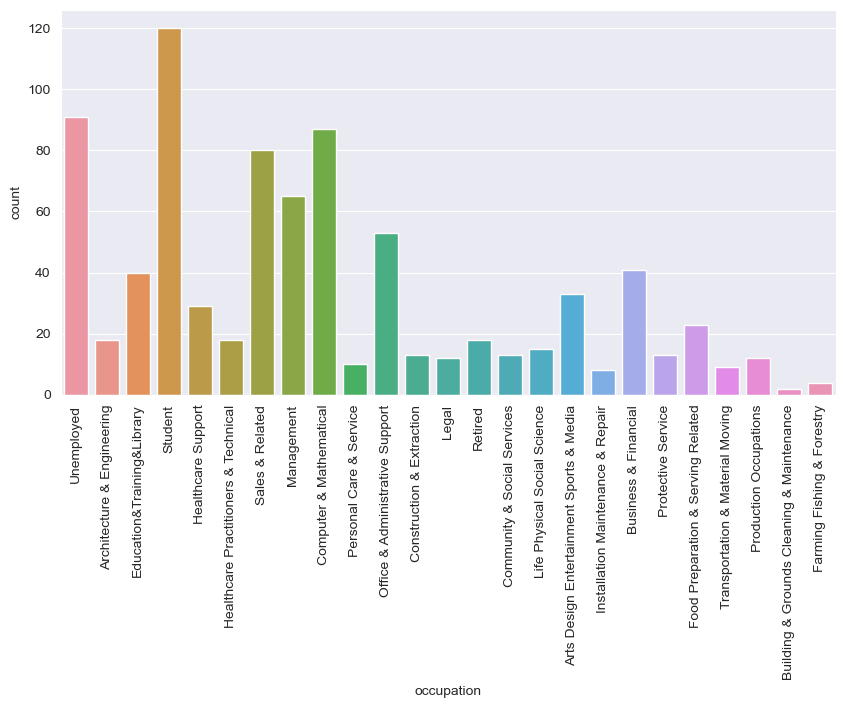

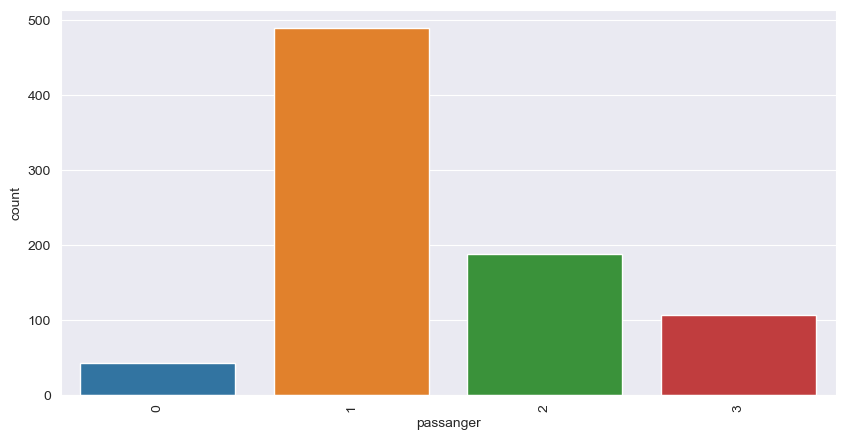

In [121]:



bar_coupons.loc[bar_coupons['income'] == 'Less than $12500', 'income'] = 12500
bar_coupons.loc[bar_coupons['income'] == '$12500 - $24999', 'income'] = 24999
bar_coupons.loc[bar_coupons['income'] == '$25000 - $37499', 'income'] = 37499
bar_coupons.loc[bar_coupons['income'] == '$37500 - $49999', 'income'] = 49999
bar_coupons.loc[bar_coupons['income'] == '$50000 - $62499', 'income'] = 62499
bar_coupons.loc[bar_coupons['income'] == '$62500 - $74999', 'income'] = 74999
bar_coupons.loc[bar_coupons['income'] == '$75000 - $87499', 'income'] = 87499
bar_coupons.loc[bar_coupons['income'] == '$87500 - $99999', 'income'] = 99999
bar_coupons.loc[bar_coupons['income'] == '$100000 or More', 'income'] = 100000

# print unique values of the column passanger
print(bar_coupons['passanger'].unique())

# Convert passanger column to numeric values, ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
bar_coupons.loc[bar_coupons['passanger'] == 'Kid(s)', 'passanger'] = 0
bar_coupons.loc[bar_coupons['passanger'] == 'Alone', 'passanger'] = 1
bar_coupons.loc[bar_coupons['passanger'] == 'Friend(s)', 'passanger'] = 2
bar_coupons.loc[bar_coupons['passanger'] == 'Partner', 'passanger'] = 3




plt.figure(figsize=(10,5))
sns.countplot(x='occupation', data=bar_coupons[bar_coupons['Y'] == 1])
plt.xticks(rotation=90)
plt.show()

# Plot Y =1 against passanger

plt.figure(figsize=(10,5))
sns.countplot(x='passanger', data=bar_coupons[bar_coupons['Y'] == 1])
plt.xticks(rotation=90)
plt.show()

# Based on these observations Student and Professional drivers are more likely to accept the bar coupons. Also, drivers with a partner are more likely to accept the bar coupons.




# Based on these observations Student and Professional drivers are more likely to accept the bar coupons. Also, drivers with a partner are more likely to accept the bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


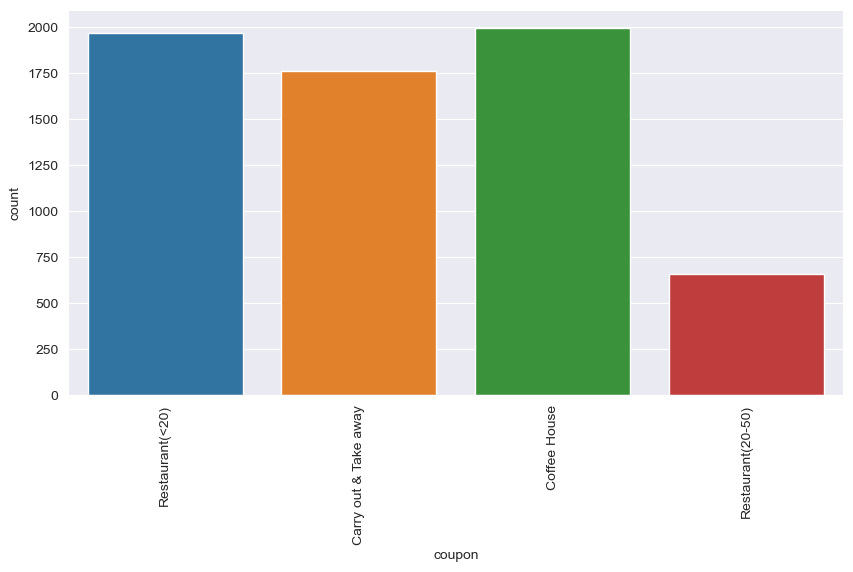

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [128]:
# Unique values of the column coupon
print(data['coupon'].unique())
# plot the coupon column where the value is not bar and Y = 1
plt.figure(figsize=(10,5))
sns.countplot(x='coupon', data=data[(data['coupon'] != 'Bar') & (data['Y'] == 1)])
plt.xticks(rotation=90)
plt.show()

# Data set for coffee house coupons
coffee_house = data[data['coupon'] == 'Coffee House']
coffee_house.head()




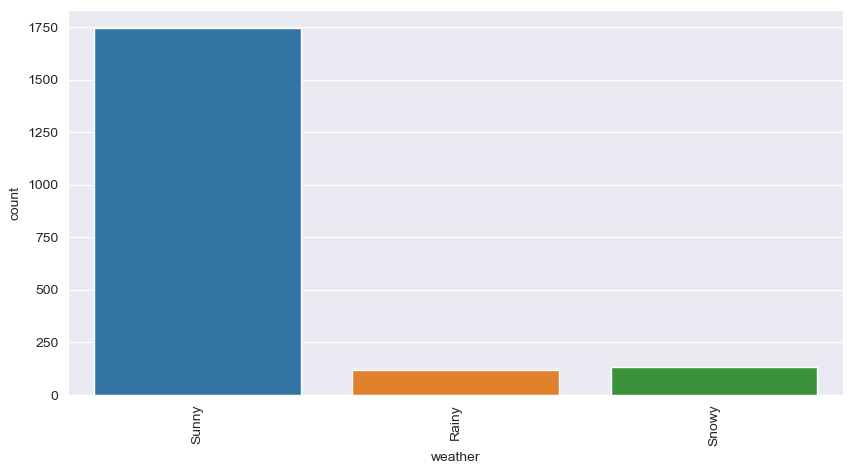

In [129]:
# count plot of wheather column and Y = 1
plt.figure(figsize=(10,5))
sns.countplot(x='weather', data=coffee_house[coffee_house['Y'] == 1])
plt.xticks(rotation=90)
plt.show()


D:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


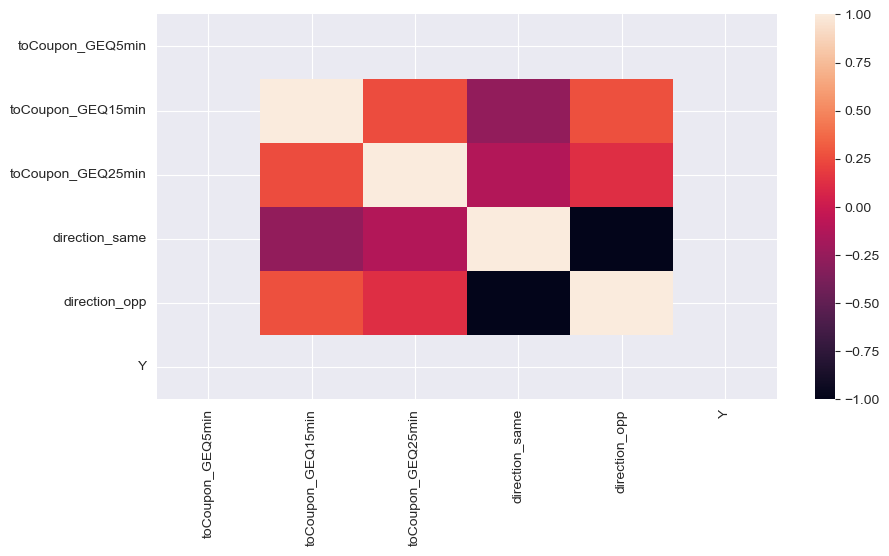

In [131]:
# correlation matrix for coffee house coupons  for Y = 1 and toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y
plt.figure(figsize=(10,5))
sns.heatmap(coffee_house[coffee_house['Y'] == 1][['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']].corr(), annot=True)
plt.show()



(array([0, 1, 2, 3]),
 [Text(0, 0, 'Kid(s)'),
  Text(1, 0, 'Alone'),
  Text(2, 0, 'Friend(s)'),
  Text(3, 0, 'Partner')])

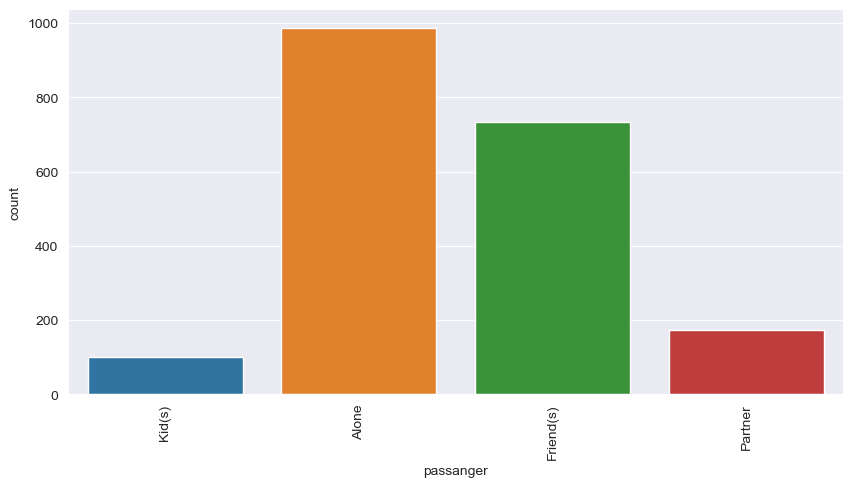

In [132]:
# count plot of passenger column and Y = 1 for coffee house coupons
plt.figure(figsize=(10,5))
sns.countplot(x='passanger', data=coffee_house[coffee_house['Y'] == 1])
plt.xticks(rotation=90)


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

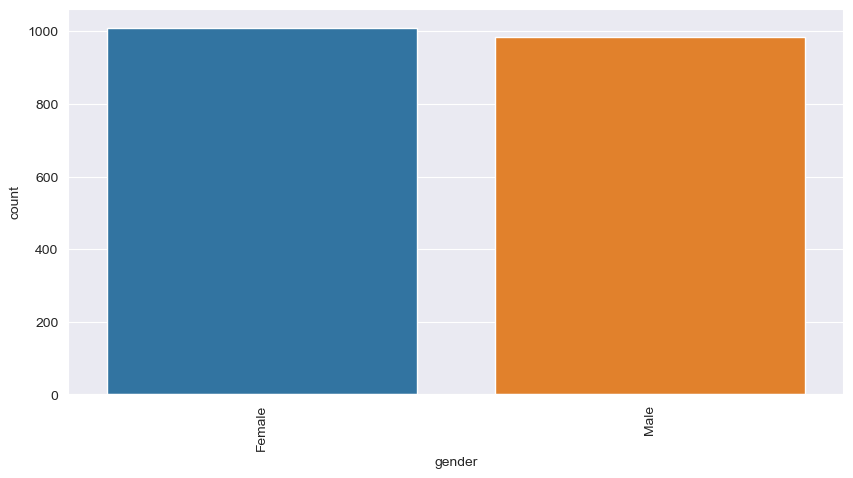

In [134]:
# count plot of occupation column and Y = 1 for coffee house coupons for gender
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=coffee_house[coffee_house['Y'] == 1])
plt.xticks(rotation=90)
